In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re

import scienceplots
plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [11]:
file = "../build/main_cost_function.csv"
length_intrinsic,doping_acceptor,cost = np.loadtxt(file, delimiter=',', unpack=True, skiprows=1)

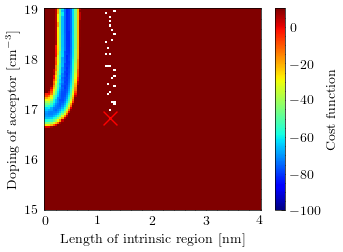

In [12]:
unique_length_intrinsic = np.unique(length_intrinsic)
unique_doping_acceptor = np.unique(doping_acceptor)

# Create a meshgrid
X, Y = np.meshgrid(unique_length_intrinsic, unique_doping_acceptor)

# Create a 2D array of the cost function
cost = cost.reshape(len(unique_doping_acceptor), len(unique_length_intrinsic))
cost = cost.T

# Plot the heatmap
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, cost, cmap='jet', vmin=-100, vmax=10)

# Create colorbar
cbar = fig.colorbar(im, ax=ax)

# Set the labels
ax.set_xlabel('Length of intrinsic region [nm]')
ax.set_ylabel('Doping of acceptor [cm$^{-3}$]')
cbar.set_label('Cost function')

# Show the minima
minima = np.argmin(cost)
minima_x = unique_length_intrinsic[minima % len(unique_length_intrinsic)]
minima_y = unique_doping_acceptor[minima // len(unique_length_intrinsic)]
ax.scatter(minima_x, minima_y, marker='x', color='red', s=100, label='Minima')

# Save the figure
plt.savefig('paper_heatmap_cf.pdf', bbox_inches='tight')